# COEFFICIENT PATH OF LASSO REGRESSION

**Add directory of m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import neccessary modules and packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from m_learn.linear_model import lasso_regression
from m_learn.utility.data_preprocessing import get_xy_data
from sklearn.model_selection import train_test_split

## 1. Load & Preprocess Data

**Output and features**

In [3]:
# output of the model
output = 'SalePrice'
# features of the model 
features = ['GarageCars',
            'BsmtFinSF1',
            'TotRmsAbvGrd',
            'LotArea',
            'GrLivArea',
            'KitchenAbvGr',
            'BedroomAbvGr']

**Load the data**

In [4]:
# retrieve the numeric data from the csv file
data = pd.read_csv('./../../data/house_prices/train.csv')._get_numeric_data()

**Fill missing values with column means**

In [5]:
data = data.fillna(data.mean())

**Do a customary train test split**

In [6]:
# train test split
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 0)
# extract the feature matrix and output vector from the training data
X_train, y_train = get_xy_data(train_data, features, output)
# extract the feature matrix and output vector from the test data
X_test, y_test = get_xy_data(test_data, features, output)

## 2. Investigate coefficient path of lasso regression

**Parameters of lasso models**

In [7]:
# tolerance of the models
tolerance = 1e2

### 2.1 Train models and collect model coefficients using different values of lambda

In [8]:
# create a logspace of l1 penalties
l1_penalties = np.logspace(3,7, num=30)
# a list to store the weights of lasso regression models trained using different l1 penalties
weights = []

# iterate through each penalty
for penalty in l1_penalties:
    # create a lasso regression model
    model = lasso_regression(penalty)
    # fit the model using training data
    model.fit(X_train, y_train, tolerance)
    # append the coefficients of the model to the designated list (excepting intercept)
    weights.append(model.coefficients[1:])

# convert the list of numpy vectors to numpy array     
weights = np.array(weights)
# store the numpy array in a pandas dataframe
weights = pd.DataFrame(data = weights, columns = features, index=l1_penalties)
weights.index.name = 'l1_penalty'

**Inspect the model coefficients at different values of l1 penalty or lambda**

In [9]:
weights.head(30)

,GarageCars,BsmtFinSF1,TotRmsAbvGrd,LotArea,GrLivArea,KitchenAbvGr,BedroomAbvGr
l1_penalty,,,,,,,
1.000000e+03,2.085771e+06,789116.362278,1.687380e+06,193799.274892,4.343400e+06,-2.074648e+06,-1.815477e+06
1.373824e+03,2.086501e+06,789108.221126,1.673505e+06,193580.420927,4.345570e+06,-2.068643e+06,-1.806735e+06
1.887392e+03,2.087502e+06,789097.036618,1.654443e+06,193279.754142,4.348550e+06,-2.060394e+06,-1.794725e+06
2.592944e+03,2.088879e+06,789081.671074,1.628256e+06,192866.690959,4.352645e+06,-2.049061e+06,-1.778226e+06
3.562248e+03,2.090769e+06,789060.561524,1.592279e+06,192299.214928,4.358270e+06,-2.033491e+06,-1.755559e+06
4.893901e+03,2.093367e+06,789031.564030,1.542853e+06,191519.599344,4.365999e+06,-2.012101e+06,-1.724419e+06
6.723358e+03,2.096935e+06,788991.750587,1.474949e+06,190448.519443,4.376616e+06,-1.982715e+06,-1.681636e+06
9.236709e+03,2.101838e+06,788937.026620,1.381662e+06,188977.073357,4.391202e+06,-1.942343e+06,-1.622861e+06
1.268961e+04,2.108592e+06,788861.954542,1.253406e+06,186952.548696,4.411249e+06,-1.886907e+06,-1.542059e+06


### 2.2 Plot of coefficient path

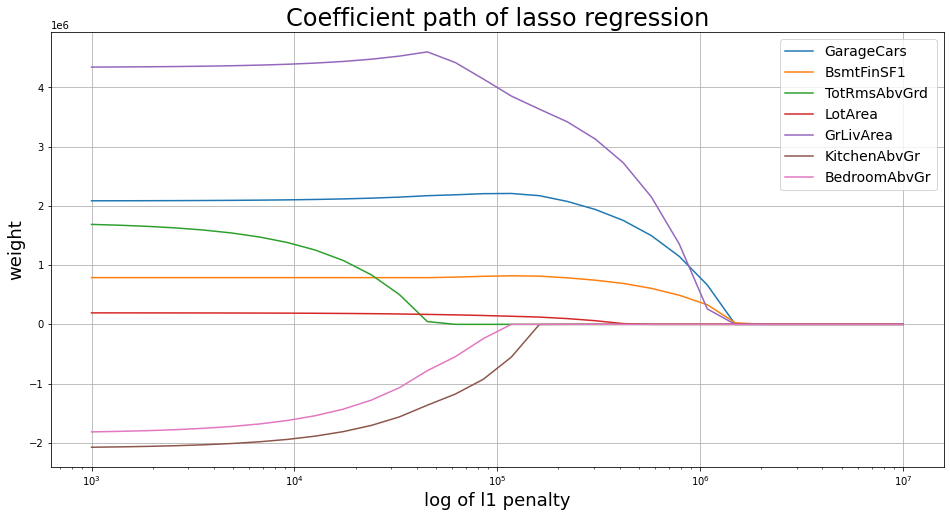

In [10]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
# iterate through each feature
for feature in features:
    # plot feature weight vs penaties (log)
    plt.plot(l1_penalties, weights[feature])

plt.xscale('log')
plt.xlabel('log of l1 penalty', fontsize=18)
plt.ylabel('weight', fontsize=18)
plt.legend(features, fontsize=14)
plt.title("Coefficient path of lasso regression", fontsize= 24)
plt.grid()
plt.show()